In [75]:
import numpy as np
import pickle
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import FormatStrFormatter

In [76]:
experiment = {
    "title": "Variation of l",
    "filename": "variation_l"
}

keys = [
    "exp7_ll_c10",
    "exp7_hl_c10",
    "exp7_mse_c10",
]

markers = ['^','*','o']

labels = [
    "Logistic",
    "Hinge",
    "MSE",
]

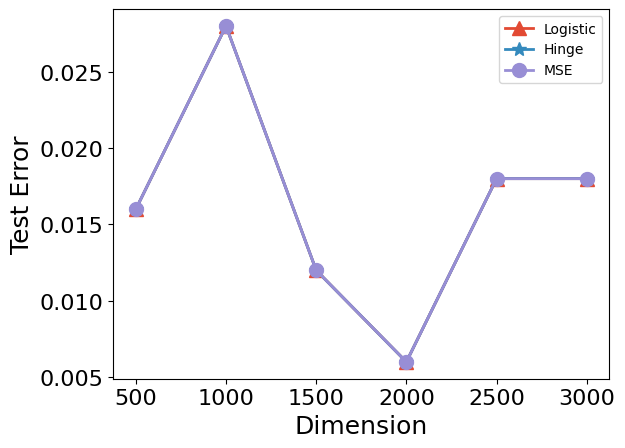

<Figure size 640x480 with 0 Axes>

In [77]:
### STEP 1: FETCH RESULTS
file_root = f'results/logs/'
results = {}

for key in keys:
    filename = key
    filename = os.path.join(file_root, filename)
    filename = os.path.join(filename, 'result.pickle')
    with (open(filename, "rb")) as file:
        results[key] = pickle.load(file)

### STEP 2: PERFORM AVG/STD COMPUTATIONS
dimensions = []
for j in range(len(results[keys[0]])):
    dimensions.append(results[keys[0]][j]['dimension'])

average_test_loss = np.zeros((len(keys),len(dimensions)))
average_test_error = np.zeros((len(keys),len(dimensions)))
average_training_loss = np.zeros((len(keys),len(dimensions)))
average_training_error = np.zeros((len(keys),len(dimensions)))

for i in range(len(keys)):
    for j in range(len(dimensions)):
        try:
            # Bound term
            c = results[keys[i]][j]['C']
            n = results[keys[i]][j]['num_samples']
            p = results[keys[i]][j]['dimension']
            mu = results[keys[i]][j]['mu_norm']
            constant = 2 * np.exp((-((n * (mu ** 4))/(c * p))))

            average_test_loss[i,j] = np.mean(results[keys[i]][j]['test_loss'])
            average_test_error[i,j] = np.mean(results[keys[i]][j]['test_error'])
            average_training_loss[i,j] = np.mean(results[keys[i]][j]['training_loss'])
            average_training_error[i,j] = np.mean(results[keys[i]][j]['training_error'])
        except:
            continue

### STEP 3: GENERATE PLOTS
palette = ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']
sns.set_palette(palette)
plt.ylabel("Test Error",size=18)
plt.xlabel("Dimension",size=18)

for (i,key) in enumerate(keys):
    plt.plot(dimensions,average_test_error[i,:],markers[i],markersize = 10,markevery=1,linewidth=2,label=labels[i],linestyle='solid')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
filename = experiment["filename"]
plt.savefig(f'{filename}.png', bbox_inches='tight',dpi=1000)
plt.show()
plt.clf()